Sylwia Kwiatkowska, sprawozdanie 5

In [2]:
#zad 1
import numpy as np

A=np.array([[1,1],[1,1.0001]])
b1=np.array([2,2.0001])
b2=np.array([2,2])

x1 = np.linalg.solve(A, b1)
x2 = np.linalg.solve(A, b2)
print("x1: ", x1)
print("x2: ", x2)

wspolcz = np.linalg.cond(A)
print("Współczynnik uwarunkowania macierzy: ", wspolcz)

"""
Niewielka zmiana jednego z elementów wektora b powoduje znaczne zmiany w rozwiązaniu układu. Współczynnik uwarunkowania 
macierzy A przekracza wartość 40 000, co świadczy o tym, że macierz ta jest źle uwarunkowana.
"""


x1:  [1. 1.]
x2:  [2. 0.]
Współczynnik uwarunkowania macierzy:  40002.00007491187


'\nNiewielka zmiana jednego z elementów wektora b powoduje znaczne zmiany w rozwiązaniu układu. Współczynnik uwarunkowania \nmacierzy A przekracza wartość 40 000, co świadczy o tym, że macierz ta jest źle uwarunkowana.\n'

In [3]:
#zad 2
from scipy.linalg import hilbert
H = hilbert(8)
wspolcz_kol = np.linalg.cond(H, 1)
wspolcz_spek = np.linalg.cond(H, 2)
wspolcz_wiersz = np.linalg.cond(H, np.inf)

print("Współczynnik uwarunkowania (norma kolumnowa): ", wspolcz_kol)
print("Współczynnik uwarunkowania (norma spektralna): ", wspolcz_spek)
print("Współczynnik uwarunkowania (norma wierszowa): ", wspolcz_wiersz)
print(H.shape)
print(H)
"""
Obliczone współczynniki uwarunkowania macierzy są bardzo duże (rzędu 10^10), macierz Hilberta jest źle uwarunkowana.
"""

Współczynnik uwarunkowania (norma kolumnowa):  33872790820.227394
Współczynnik uwarunkowania (norma spektralna):  15257575516.147259
Współczynnik uwarunkowania (norma wierszowa):  33872790819.49471
(8, 8)
[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125     ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1       ]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667]]


'\nObliczone współczynniki uwarunkowania macierzy są bardzo duże (rzędu 10^10), macierz Hilberta jest źle uwarunkowana.\n'

In [4]:
#zad 3
import math
from numpy import array
from scipy.linalg import solve_triangular
from numpy.linalg import lstsq
from timeit import timeit


n = 20
t = np.linspace(0, 1, n)
b = array([math.cos(4*t[i]) for i in range(t.size)])

vand = np.vander(t,increasing=True)

def rozw1(A, b):     #numpy.linalg.solve
    return np.linalg.solve(A, b)

x1 = rozw1(vand, b)

def rozw2(A, b):  #metoda QR
    Q, R = np.linalg.qr(A) #Q^T = Q^-1 (ortogonalna), R-trójk.górna
    #QRx=b; Rx = (Q^T)*b
    return solve_triangular(R, np.dot(np.transpose(Q), b))

x2 = rozw2(vand, b)

def rozw3(A, b):
    return lstsq(A, b, rcond=None)[0]

x3 = rozw3(vand, b)


czas1 = timeit('rozw1(vand,b)', setup='from __main__ import rozw1, vand, b', number=1000) #Runs the test 1000 times
czas2 = timeit('rozw2(vand,b)', setup='from __main__ import rozw2, vand, b', number=1000)
czas3 = timeit('rozw3(vand,b)', setup='from __main__ import rozw3, vand, b', number=1000)

print("numpy.linalg.solve: ", czas1)
print("scipy.linalg.solve_triangular: ", czas2)
print("numpy.linalg.lstsq: ", czas3)

"""
Najszybsze-linalg.solve, najwolniejsze solve_triangular-najpierw należy dokonać rozkładu na dwie macierze, 
a dopiero potem rozwiązań równanie. solve_trangular - pośrednia szybkość.

Jeśli A jest kwadratowa, x jest dokładnym rozwiązaniem równania: 
If a is square and of full rank, then x (but for round-off error) is the “exact” solution of the equation.
"""

#print(len(vand[0]))
b1=array([b])
#print(b1.shape)
x11=array([x1])
#print(x11.shape)

def norma_residuum(A, b, x): #obliczam residuum: r=b-Ax, a następnie normę euklidesową z wektora r
    result=0
    Ax=np.dot(A,x) #mnożenie macierzy
    for i in range (0,len(A)):
        result+=math.pow((abs(b[i]-Ax[i])),2)
    return math.sqrt(result)

norm_res1 = norma_residuum(vand, b, x1)
norm_res2 = norma_residuum(vand, b, x2)
norm_res3 = norma_residuum(vand, b, x3)

print(norm_res1)
print(norm_res2)
print(norm_res3)

"""
Norma residuum jest najmniejsza dla metody numpy.linalg.solve, największa dla numpy.linalg.lstsq. Oznacza to, 
że jakoś otrzymanych wyników jest najlepszej jakości dla pierwszej metody.
"""


numpy.linalg.solve:  0.04380660700007866
scipy.linalg.solve_triangular:  0.1810348270000759
numpy.linalg.lstsq:  0.10882495300006667
2.6625106458567517e-15
3.593677202404669e-15
4.750543327066995e-15


'\nNorma residuum jest najmniejsza dla metody numpy.linalg.solve, największa dla numpy.linalg.lstsq. Oznacza to, \nże jakoś otrzymanych wyników jest najlepszej jakości dla pierwszej metody.\n'

In [5]:
#zad 4
import matplotlib.pyplot as plt

n=3

def generuj_macierz():
    glowna_przekatna=array([1. for i in range(n)])
    wynik=np.diag(glowna_przekatna)

    for i in range(1,n):
        it = n-i
        x, y = i, 0
        while it > 0:               
            wynik[x][y] = wynik[y][x] = np.random.uniform(-1,1) #macierz symetryczna, wartości losowe [-1;1]  
            x += 1
            y += 1
            it -= 1
    
    return wynik
   
def zastap_wartosci_zerami(A, tau):
    wynik = A.copy()
    for i in range(1,n):
        it = n-i
        x, y = i, 0
        while it > 0:               
            if(abs(wynik[x][y]) > tau):
                wynik[x][y] = wynik[y][x] = 0.            
            x += 1
            y += 1
            it -= 1
    
    return wynik

b = np.linspace(-1, 1, n)
tau = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]

A = generuj_macierz()

wspolcz_uwarunk = []
for i in range (0, len(tau)):
    wspolcz_uwarunk.append(np.linalg.cond(zastap_wartosci_zerami(A, tau[i])))

plt.figure(figsize=(12,6))
plt.plot(tau, wspolcz_uwarunk)
plt.title('Wykres wartości współczynnika uwarunkowania macierzy w zależności od wartości tau')
plt.xlabel('tau')
plt.ylabel('cond(A)')
plt.show()

"""
Współczynnik uwarunkowania macierzy rośnie wraz ze wzrostem wartości tau. Oznacza to, że im mniejsza wartość tau, tym lepiej
uwarunkowana jest macierz.
"""

<Figure size 1200x600 with 1 Axes>

'\nWspółczynnik uwarunkowania macierzy rośnie wraz ze wzrostem wartości tau. Oznacza to, że im mniejsza wartość tau, tym lepiej\nuwarunkowana jest macierz.\n'

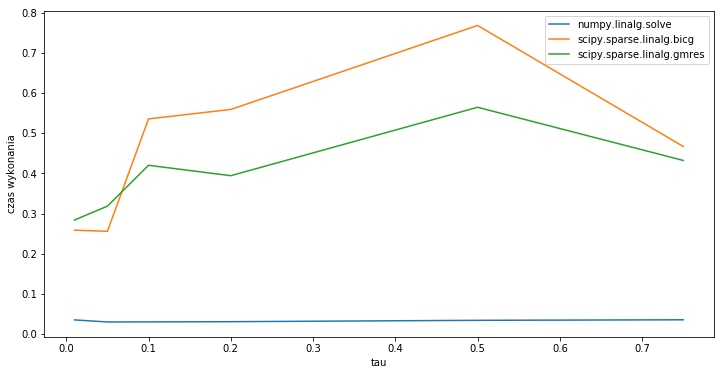

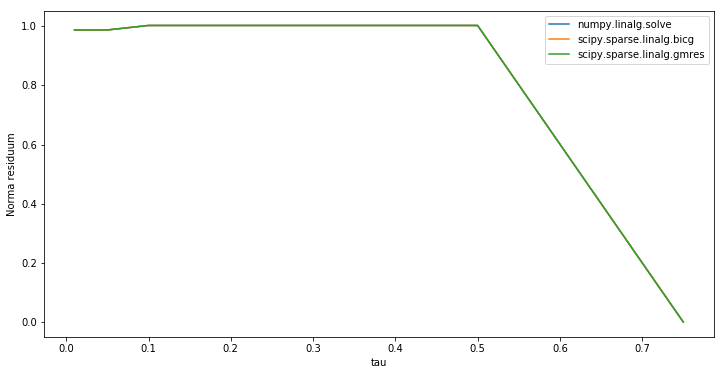

'\nNajszybsza jest metoda numpy.linalg.solve, której czas wykonywania praktycznie nie zależy od wartości tau.\nW przypadku metody scipy.sparse.linalg.bicg wraz ze wzrostem tau, powoli wzrasta czas wykonania.\nscipy.sparse.linalg.gmres działa najwolniej, im większe tau, tym wolniejsze wykonanie funkcji.\nOgólnie, im lepiej uwarunkowana macierz(mniejsze tau), tym szybsze obliczenia. \nJakość obliczeń jest tym lepsza, im mniejsze jest tau.\n'

In [6]:
#zad 4 c.d.
import scipy.sparse.linalg

def rozw1(A, b, tau):     #numpy.linalg.solve
    return np.linalg.solve(zastap_wartosci_zerami(A, tau), b)

def rozw2(A, b, tau):     #scipy.sparse.linalg.bicg
    return scipy.sparse.linalg.bicg(zastap_wartosci_zerami(A, tau), b)[0]

def rozw3(A, b, tau):     #scipy.sparse.linalg.gmres
    return scipy.sparse.linalg.gmres(zastap_wartosci_zerami(A, tau), b)[0]

rozwiaz1=[]
for i in range(0, len(tau)):
    rozwiaz1.append(rozw1(A, b, tau[i]))
    
rozwiaz2=[]
for i in range(0, len(tau)):
    rozwiaz2.append(rozw2(A, b, tau[i]))
    
rozwiaz3=[]
for i in range(0, len(tau)):
    rozwiaz3.append(rozw3(A, b, tau[i]))
    
czas1, czas2, czas3 = [],[], []
norma_res1, norma_res2, norma_res3 = [], [], []
for i in range (0, len(tau)):
    czas1.append(timeit('rozw1(A,b,tau['+str(i)+'])', setup='from __main__ import rozw1, A, b, tau', number=1000))
    czas2.append(timeit('rozw2(A,b,tau['+str(i)+'])', setup='from __main__ import rozw2, A, b, tau', number=1000))
    czas3.append(timeit('rozw3(A,b,tau['+str(i)+'])', setup='from __main__ import rozw3, A, b, tau', number=1000))
    norma_res1.append(norma_residuum(A, b, rozw1(A,b,tau[i])))
    norma_res2.append(norma_residuum(A, b, rozw2(A,b,tau[i])))
    norma_res3.append(norma_residuum(A, b, rozw3(A,b,tau[i])))




plt.figure(figsize=(12,6))
plt.plot(tau, czas1, label='numpy.linalg.solve')
plt.plot(tau, czas2, label='scipy.sparse.linalg.bicg')
plt.plot(tau, czas3, label='scipy.sparse.linalg.gmres')
#plt.plot(tau, wspolcz_uwarunk, label='współczynnik uwarunkowania macierzy')

plt.xlabel('tau')
plt.ylabel('czas wykonania')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(tau, norma_res1, label='numpy.linalg.solve')
plt.plot(tau, norma_res2, label='scipy.sparse.linalg.bicg')
plt.plot(tau, norma_res3, label='scipy.sparse.linalg.gmres')
#plt.plot(tau, wspolcz_uwarunk, label='współczynnik uwarunkowania macierzy')

plt.xlabel('tau')
plt.ylabel('Norma residuum')
plt.legend()
plt.show()

"""
Najszybsza jest metoda numpy.linalg.solve, której czas wykonywania praktycznie nie zależy od wartości tau.
W przypadku metody scipy.sparse.linalg.bicg wraz ze wzrostem tau, powoli wzrasta czas wykonania.
scipy.sparse.linalg.gmres działa najwolniej, im większe tau, tym wolniejsze wykonanie funkcji.
Ogólnie, im lepiej uwarunkowana macierz(mniejsze tau), tym szybsze obliczenia. 
Jakość obliczeń jest tym lepsza, im mniejsze jest tau.
"""

In [7]:
#zad 5
import numpy as np
from scipy.linalg import solve

def spr_promien_spektr(A):
    L_plus_D = np.tril(A) #trojkatna dolna, L+D
    U = A - L_plus_D #naddiagonalna
    Mgs = np.dot(-np.linalg.inv(L_plus_D), U)
    w, v = np.linalg.eig(Mgs) #wartości, wektory własne
    print("Wartości własne: ", w)
    for i in range (0, len(w)):
        if(abs(w[i])>1):
            return 0
    return 1
        
    
    
    
def gauss(A, b, n): #n - ilość iteracji
    x=[1 for i in range(0,len(b))] #początkowo
    L_plus_D = np.tril(A) #trojkatna dolna, L+D
    U = A - L_plus_D #naddiagonalna
    if(spr_promien_spektr(A) == 0):
        print("Promień spektralny większy od 1")
        return None
    
    for i in range(n):
        x = np.dot(np.linalg.inv(L_plus_D), b - np.dot(U, x))
        #print(x)
    return x

n = 50

print("Układ 1")
A=np.array([[1,1],[1,1.0001]])
b=np.array([2,2.0001])

print(gauss(A, b, n))
print(solve(A, b))

print("Układ 2")
A=np.array([[1,2,3],[2,1,3],[3,2,1]])
b=np.array([1,2,0])
print(gauss(A, b, n))
print(solve(A, b))


"""
Dla układu 1 wynik pokrywa się z rezultatem otrzymanym z funkcji solve. W przypadku drugiego układu wynik metody Gaussa-Seidla
nie pokrywa się z wynikiem z metody solve, nie jest spełniony warunek zbieżności - promień spektralny A jest większy od 1.
"""

Układ 1
Wartości własne:  [0.         0.99990001]
[1. 1.]
[1. 1.]
Układ 2
Wartości własne:  [0. +0.j         3.5+2.39791576j 3.5-2.39791576j]
Promień spektralny większy od 1
None
[ 0.25 -0.75  0.75]


'\nDla układu 1 wynik pokrywa się z rezultatem otrzymanym z funkcji solve. W przypadku drugiego układu wynik metody Gaussa-Seidla\nnie pokrywa się z wynikiem z metody solve, nie jest spełniony warunek zbieżności - promień spektralny A jest większy od 1.\n'